In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from glob import glob

In [13]:
parasitized_files = glob("C:/Users/LENOVO/Downloads/cell_images/Parasitized/*")
uninfected_files = glob("C:/Users/LENOVO/Downloads/cell_images/Uninfected/*")

In [14]:
print(len(parasitized_files))
print(len(uninfected_files))

13780
13780


In [15]:
im_size = [112,112, 3]
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=im_size)
resnet.trainable=True

In [16]:
#!python build_dataset.py

In [17]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 40,366,466
Trainable params: 40,313,346
Non-trainable params: 53,120
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('C:/Users/LENOVO/Downloads/cell_images/training/',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19842 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory('C:/Users/LENOVO/Downloads/cell_images/testing/',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5512 images belonging to 2 classes.


In [23]:
r=model.fit(training_set,
          epochs=5,
          steps_per_epoch=len(training_set),
          validation_data=test_set,
          validation_steps=len(test_set)
          )
          

Epoch 1/5
621/621 [==============================] - 2465s 4s/step - loss: 0.3841 - accuracy: 0.9240 - val_loss: 0.7159 - val_accuracy: 0.5054
Epoch 2/5
621/621 [==============================] - 2305s 4s/step - loss: 0.1636 - accuracy: 0.9499 - val_loss: 0.1595 - val_accuracy: 0.9526
Epoch 3/5
621/621 [==============================] - 2403s 4s/step - loss: 0.1681 - accuracy: 0.9494 - val_loss: 16.9322 - val_accuracy: 0.5259
Epoch 4/5
621/621 [==============================] - 2251s 4s/step - loss: 0.1694 - accuracy: 0.9506 - val_loss: 0.1784 - val_accuracy: 0.9479
Epoch 5/5
621/621 [==============================] - 2336s 4s/step - loss: 0.1462 - accuracy: 0.9522 - val_loss: 0.1503 - val_accuracy: 0.9490


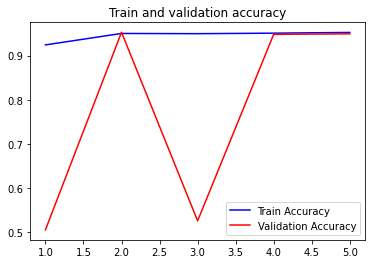

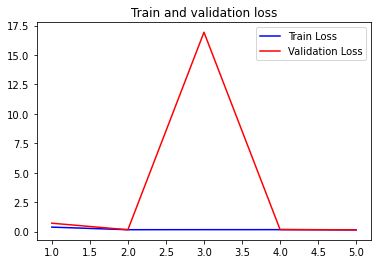

In [24]:
train_accs = r.history['accuracy']
train_losses = r.history['loss']
val_accs = r.history['val_accuracy']
val_losses = r.history['val_loss']

epochs = range(1, len(train_accs)+1)

plt.plot(epochs,train_accs, 'b', label='Train Accuracy')
plt.plot(epochs,val_accs, 'r', label='Validation Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,train_losses, 'b', label='Train Loss')
plt.plot(epochs,val_losses, 'r', label='Validation Loss')
plt.title('Train and validation loss')
plt.legend()

plt.show()

In [25]:
model.save('final_model')

C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: final_model\assets


In [26]:
model.save('final_model.h5')

In [28]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('C:/Users/LENOVO/Downloads/cell_images/validation/',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2204 images belonging to 2 classes.


In [29]:
model.evaluate_generator(val_set, len(val_set) )[1]

C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1968: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.9428312182426453